In [162]:
import numpy as np,pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [90]:
hr_train=pd.read_csv(r'C:\Users\user\Documents\Python\HR Analytics\train_hr.csv',header=0,delimiter=' *, *',index_col=0) #delimiter bcos to trim extra spaces

hr_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
hr_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.9+ MB


In [5]:
hr_train.isna().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

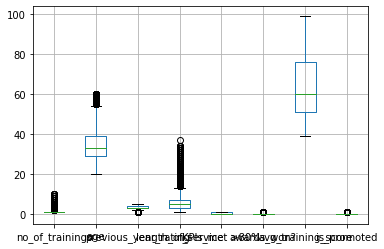

In [7]:
hr_train.boxplot()

In [8]:
#Features Selection

In [91]:
hr_train["education"].mode()

0    Bachelor's
dtype: object

In [92]:
hr_train["previous_year_rating"].mode()

0    3.0
dtype: float64

In [93]:
for value in ['education','previous_year_rating']:
    hr_train[value].fillna(hr_train[value].mode()[0],inplace=True)

In [94]:
hr_train.isna().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [77]:
hr_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [78]:
hr_train.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [95]:
colname=[]
for x in hr_train.columns:
    if hr_train[x].dtype=='object':
        colname.append(x)
        
colname 

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [96]:
#transforming categorical data to numerical

from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    hr_train[x]=le.fit_transform(hr_train[x])
    

In [97]:
hr_train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [29]:
X=hr_train.iloc[:,0:-1]   #iloc = dataframe lega , Values= data array lega

In [32]:
Y=hr_train.iloc[:,-1]

In [33]:
X.shape

(54808, 12)

In [34]:
Y.shape

(54808,)

In [35]:
X

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
65438,7,31,2,0,2,1,35,5.0,8,1,0,49
65141,4,14,0,1,0,1,30,5.0,4,0,0,60
7513,7,10,0,1,2,1,34,3.0,7,0,0,50
2542,7,15,0,1,0,2,39,1.0,10,0,0,50
48945,8,18,0,1,0,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...
3030,8,5,0,1,2,1,48,3.0,17,0,0,78
74592,4,19,2,0,0,1,37,2.0,6,0,0,56
13918,0,0,0,1,0,1,27,5.0,3,1,0,79


In [36]:
#as values ae in Smaller range Scalling is not nessesry
#but then also if want to scale u can....
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)   #it use to sclae the value in between -3 to +3

X=scaler.transform(X)

In [37]:
hr_train.dtypes

department                int32
region                    int32
education                 int32
gender                    int32
recruitment_channel       int32
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [38]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.3,random_state=10)


In [39]:
from sklearn.linear_model import LogisticRegression

#create a model object
classifier=LogisticRegression()  #oject

#fitting training data to model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))


print(classifier.coef_)
print(classifier.intercept_)

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)    #Accuracy=

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the Model:",acc*100)

[[14994    70]
 [ 1273   106]]
Classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15064
           1       0.60      0.08      0.14      1379

    accuracy                           0.92     16443
   macro avg       0.76      0.54      0.55     16443
weighted avg       0.89      0.92      0.89     16443

Accuracy of the Model: 91.8323906829654


In [41]:
#store the pediction probabilites
y_pred_prob=classifier.predict_proba(X_test)
print(y_pred_prob)  # i.e. class 0 me ya class1 me jane ki kitni possiblity hai aaisa.....

[[0.98740788 0.01259212]
 [0.99260644 0.00739356]
 [0.96696992 0.03303008]
 ...
 [0.98904187 0.01095813]
 [0.91252257 0.08747743]
 [0.95779605 0.04220395]]


In [44]:
#Creating a manual threashold

y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.45:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [43]:
#Gneric for differnt thresold  chcking mutiple error
for a in np.arange(0.30,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error:",
        cfm[1,0]," , type 1 error:", cfm[0,1])
    

Errors at threshold  0.3 : 1623  , type 2 error: 1067  , type 1 error: 556
Errors at threshold  0.31 : 1593  , type 2 error: 1083  , type 1 error: 510
Errors at threshold  0.32 : 1565  , type 2 error: 1100  , type 1 error: 465
Errors at threshold  0.33 : 1527  , type 2 error: 1107  , type 1 error: 420
Errors at threshold  0.34 : 1494  , type 2 error: 1115  , type 1 error: 379
Errors at threshold  0.35000000000000003 : 1473  , type 2 error: 1131  , type 1 error: 342
Errors at threshold  0.36000000000000004 : 1448  , type 2 error: 1146  , type 1 error: 302
Errors at threshold  0.37000000000000005 : 1426  , type 2 error: 1161  , type 1 error: 265
Errors at threshold  0.38000000000000006 : 1413  , type 2 error: 1173  , type 1 error: 240
Errors at threshold  0.39000000000000007 : 1409  , type 2 error: 1193  , type 1 error: 216
Errors at threshold  0.4000000000000001 : 1396  , type 2 error: 1205  , type 1 error: 191
Errors at threshold  0.4100000000000001 : 1384  , type 2 error: 1215  , type

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)    #Accuracy=

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the Model:",acc*100)

[[14994    70]
 [ 1273   106]]
Classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15064
           1       0.60      0.08      0.14      1379

    accuracy                           0.92     16443
   macro avg       0.76      0.54      0.55     16443
weighted avg       0.89      0.92      0.89     16443

Accuracy of the Model: 91.8323906829654


# so no accuracy increasing so will try with k nearest


In [46]:
#predicting using the KNeighbors_Classifier
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(round(np.sqrt(len(X_train)),0)),metric="euclidean")

#fit the model on the data and predict the value
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)

print(list(zip(Y_test,Y_pred)))

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)    #Accuracy=

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the Model:",acc*100)

[[15046    18]
 [ 1281    98]]
Classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15064
           1       0.84      0.07      0.13      1379

    accuracy                           0.92     16443
   macro avg       0.88      0.53      0.54     16443
weighted avg       0.92      0.92      0.89     16443

Accuracy of the Model: 92.09998175515418


# Decision tree

In [48]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10,min_samples_leaf=5,max_depth=10)

#fit the model on the Data and predict the values
model_DecisionTree.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [49]:
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[0 0 0 ... 0 0 0]
[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0

In [50]:
# from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[14988    76]
 [  997   382]]
0.9347442680776014
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     15064
           1       0.83      0.28      0.42      1379

    accuracy                           0.93     16443
   macro avg       0.89      0.64      0.69     16443
weighted avg       0.93      0.93      0.92     16443



In [51]:
#Using cross validation
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

classifier=svm.SVC(kernel='rbf',C=1.0,gamma=0.1) 
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)

KeyboardInterrupt: 

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#confusion matrix

print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[14988    76]
 [  997   382]]
0.9347442680776014
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     15064
           1       0.83      0.28      0.42      1379

    accuracy                           0.93     16443
   macro avg       0.89      0.64      0.69     16443
weighted avg       0.93      0.93      0.92     16443



In [53]:
#predicting using the Bagging_Classifier
from sklearn.ensemble import ExtraTreesClassifier
 
model=ExtraTreesClassifier(100,random_state=10)
#fit the model on the data and predict the values
model=model.fit(X_train,Y_train)
 
Y_pred=model.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#confusion matrix

print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[14884   180]
 [  974   405]]
0.9298181597032171
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     15064
           1       0.69      0.29      0.41      1379

    accuracy                           0.93     16443
   macro avg       0.82      0.64      0.69     16443
weighted avg       0.92      0.93      0.92     16443



In [55]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier
 
model_RandomForest=RandomForestClassifier(n_estimators=101,random_state=10)
 
#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)
 
Y_pred=model_RandomForest.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#confusion matrix

print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[14962   102]
 [  995   384]]
0.9332846804111172
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     15064
           1       0.79      0.28      0.41      1379

    accuracy                           0.93     16443
   macro avg       0.86      0.64      0.69     16443
weighted avg       0.93      0.93      0.92     16443



# Upsampling


In [107]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = hr_train[hr_train.is_promoted==0]
df_minority = hr_train[hr_train.is_promoted==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
replace=True, # sample with replacement
n_samples=50140, # to match majority class
random_state=10) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.is_promoted.value_counts()

1    50140
0    50140
Name: is_promoted, dtype: int64

In [108]:
X=df_upsampled.values[:,0:-1]

In [109]:
Y=df_upsampled.values[:,-1]

In [110]:
X.shape
#Y.shape

(100280, 12)

In [111]:
#as values ae in Smaller range Scalling is not nessesry
#but then also if want to scale u can....
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)   #it use to sclae the value in between -3 to +3

X=scaler.transform(X)

In [112]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.3,random_state=10)


In [113]:
from sklearn.linear_model import LogisticRegression

#create a model object
classifier=LogisticRegression()  #oject

#fitting training data to model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))


print(classifier.coef_)
print(classifier.intercept_)

[(1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (1.

In [114]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)    #Accuracy=

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the Model:",acc*100)

[[10813  4202]
 [ 4231 10838]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72     15015
         1.0       0.72      0.72      0.72     15069

    accuracy                           0.72     30084
   macro avg       0.72      0.72      0.72     30084
weighted avg       0.72      0.72      0.72     30084

Accuracy of the Model: 71.96848823294775


In [117]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10,min_samples_leaf=10,max_depth=10)

#fit the model on the Data and predict the values
model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [119]:
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[1. 0. 0. ... 0. 1. 0.]
[(1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.

In [120]:
# from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[10637  4378]
 [  761 14308]]
0.8291783007578779
              precision    recall  f1-score   support

         0.0       0.93      0.71      0.81     15015
         1.0       0.77      0.95      0.85     15069

    accuracy                           0.83     30084
   macro avg       0.85      0.83      0.83     30084
weighted avg       0.85      0.83      0.83     30084



In [121]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)    #Accuracy=

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the Model:",acc*100)

[[10637  4378]
 [  761 14308]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.93      0.71      0.81     15015
         1.0       0.77      0.95      0.85     15069

    accuracy                           0.83     30084
   macro avg       0.85      0.83      0.83     30084
weighted avg       0.85      0.83      0.83     30084

Accuracy of the Model: 82.91783007578779


In [131]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree1=DecisionTreeClassifier(criterion="gini",random_state=10)#,min_samples_leaf=5,max_depth=10

#fit the model on the Data and predict the values
model_DecisionTree1.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [132]:
Y_pred=model_DecisionTree1.predict(X_test)
print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[1. 0. 1. ... 0. 1. 0.]
[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.

In [133]:
# from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[14000  1015]
 [    0 15069]]
0.9662611354873022
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97     15015
         1.0       0.94      1.00      0.97     15069

    accuracy                           0.97     30084
   macro avg       0.97      0.97      0.97     30084
weighted avg       0.97      0.97      0.97     30084



In [134]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)    #Accuracy=

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the Model:",acc*100)

[[14000  1015]
 [    0 15069]]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97     15015
         1.0       0.94      1.00      0.97     15069

    accuracy                           0.97     30084
   macro avg       0.97      0.97      0.97     30084
weighted avg       0.97      0.97      0.97     30084

Accuracy of the Model: 96.62611354873022


In [135]:
from sklearn import tree
with open("model_DecisionTree1.txt", "w") as f:
    
    f = tree.export_graphviz(model_DecisionTree1, feature_names=colname[:-1],
                             out_file=f)


#generate the file and upload the code in webgraphviz.com to plot the decision tree

ValueError: Length of feature_names, 4 does not match number of features, 12

In [148]:
hr_test=pd.read_csv(r'C:\Users\user\Documents\Python\HR Analytics\test_hr.csv',header=0,delimiter=' *, *',index_col=0) #delimiter bcos to trim extra spaces

hr_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [149]:
hr_test.isna().sum()

department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [150]:
for value in ['education','previous_year_rating']:
    hr_test[value].fillna(hr_test[value].mode()[0],inplace=True)

In [151]:
hr_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 8724 to 5973
Data columns (total 12 columns):
department              23490 non-null object
region                  23490 non-null object
education               23490 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    23490 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 2.3+ MB


In [152]:
colname=[]
for x in hr_test.columns:
    if hr_test[x].dtype=='object':
        colname.append(x)
        
colname 

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [153]:
#transforming categorical data to numerical

from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    hr_test[x]=le.fit_transform(hr_test[x])
    

In [154]:
hr_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23490 entries, 8724 to 5973
Data columns (total 12 columns):
department              23490 non-null int32
region                  23490 non-null int32
education               23490 non-null int32
gender                  23490 non-null int32
recruitment_channel     23490 non-null int32
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    23490 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int32(5), int64(6)
memory usage: 1.9 MB


In [155]:
X_test_new=hr_test

In [157]:
X_test_new=scaler.transform(X_test_new)
#X=scaler.transform(X)

In [159]:
Y_pred1=model_DecisionTree1.predict(X_test_new)
#print(Y_pred1)
#print(list(zip(X_test_new,Y_pred1)))

In [164]:
Y_pred1=Y_pred1.astype(int)

In [165]:
hr_test11=pd.read_csv(r'C:\Users\user\Documents\Python\HR Analytics\test_hr.csv',header=0,delimiter=' *, *',index_col=0) #delimiter bcos to trim extra spaces
hr_test11["predict_value"]=Y_pred1
hr_test11.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,predict_value
employee_id,,,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,0
74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0
72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0
38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0
64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0


In [167]:
hr_test11.predict_value.value_counts()

0    21134
1     2356
Name: predict_value, dtype: int64

In [168]:
hr_test11.predict_value=hr_test11.predict_value.map({1:"Promoted",0:"Not Promoted"})

In [169]:
hr_test11.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,predict_value
employee_id,,,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,Not Promoted
74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,Not Promoted
72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,Not Promoted
38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,Not Promoted
64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,Not Promoted


In [170]:
hr_test11.predict_value.value_counts()

Not Promoted    21134
Promoted         2356
Name: predict_value, dtype: int64

In [171]:
hr_test11.head(50)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,predict_value
employee_id,,,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,Not Promoted
74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,Not Promoted
72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,Not Promoted
38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,Not Promoted
64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,Not Promoted
46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68,Not Promoted
54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,1,0,57,Promoted
67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,0,85,Not Promoted
66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,0,75,Not Promoted


In [172]:
hr_test11.to_excel("HR Analytics Results.xlsx")